In [1]:
#Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import shap
import sklearn
import pickle

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import log_loss
from statistics import mean
import scipy as sp
import scipy.stats

from hyperopt.pyll.base import scope
from hyperopt import hp, fmin, tpe, Trials
from hyperopt import space_eval

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)
sns.set_palette("coolwarm_r", 4)

### データの読み込み

In [2]:
#Reading the data files

train = pd.read_csv(r"C:\Users\NDO00\OneDrive\デスクトップ\MI\mi_book\e-commerce\train.csv",index_col = 'id')
test = pd.read_csv(r"C:\Users\NDO00\OneDrive\デスクトップ\MI\mi_book\je-commerce\test.csv",index_col = 'id')
sample = pd.read_csv(r"C:\Users\NDO00\OneDrive\デスクトップ\MI\mi_book\e-commerce\test.csv")

## EDA

訓練データの確認

In [3]:
print(f'Shape of train data: {train.shape}')
print(f'Missing values count: {train.isna().sum().sum()}')

train.head()

Shape of train data: (100000, 51)
Missing values count: 0


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0,Class_2
1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0,Class_1
3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,Class_4
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,Class_2


In [4]:
train.info()
print ("*"*40)
train.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 51 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   feature_0   100000 non-null  int64 
 1   feature_1   100000 non-null  int64 
 2   feature_2   100000 non-null  int64 
 3   feature_3   100000 non-null  int64 
 4   feature_4   100000 non-null  int64 
 5   feature_5   100000 non-null  int64 
 6   feature_6   100000 non-null  int64 
 7   feature_7   100000 non-null  int64 
 8   feature_8   100000 non-null  int64 
 9   feature_9   100000 non-null  int64 
 10  feature_10  100000 non-null  int64 
 11  feature_11  100000 non-null  int64 
 12  feature_12  100000 non-null  int64 
 13  feature_13  100000 non-null  int64 
 14  feature_14  100000 non-null  int64 
 15  feature_15  100000 non-null  int64 
 16  feature_16  100000 non-null  int64 
 17  feature_17  100000 non-null  int64 
 18  feature_18  100000 non-null  int64 
 19  feature_19  100000 non-n

feature_0     11
feature_1     31
feature_2      7
feature_3     26
feature_4     38
feature_5     11
feature_6     28
feature_7     32
feature_8     37
feature_9     18
feature_10    17
feature_11    13
feature_12    12
feature_13     4
feature_14    52
feature_15    21
feature_16    20
feature_17    17
feature_18    14
feature_19    58
feature_20    18
feature_21    36
feature_22     5
feature_23    20
feature_24    35
feature_25    23
feature_26    22
feature_27    32
feature_28    24
feature_29    14
feature_30    43
feature_31    46
feature_32    30
feature_33    25
feature_34    26
feature_35    44
feature_36     4
feature_37    15
feature_38    71
feature_39    70
feature_40    22
feature_41    31
feature_42    40
feature_43    33
feature_44    10
feature_45    27
feature_46    30
feature_47    26
feature_48    45
feature_49    21
target         4
dtype: int64

訓練データについて、
欠損値はない。
100000のデータに対し、整数値のユニークな値が多くとも60個割り当てられているので、特徴量は全てカテゴリ変数となっている。
目的変数は４種類のオブジェクト変数

テストデータの確認

In [5]:
print(f'Shape of test data: {test.shape}')
print(f'Missing values count: {test.isna().sum().sum()}')

test.head()

Shape of test data: (50000, 50)
Missing values count: 0


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100000,0,0,0,0,0,0,4,4,0,0,5,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,5,0,5,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
100001,0,0,1,0,0,0,2,0,7,7,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,4,0,2,0,0,2,0,3,6,3,0,0,6,0,3,0,1,0,0,0,1,0,2,1
100002,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,4,4,0,0,0,0,0,3,0,0,0,0,0,2,11,0,0,0,0,1,0,0,0,0,6,0
100003,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,4,1,0,0,1,0,0,1,1,1,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,6,9,14,3
100004,0,0,0,0,0,0,1,0,4,0,0,1,0,0,9,0,0,0,0,0,0,3,0,0,0,0,0,0,2,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [6]:
test.info()
print ("*"*40)
test.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 100000 to 149999
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   feature_0   50000 non-null  int64
 1   feature_1   50000 non-null  int64
 2   feature_2   50000 non-null  int64
 3   feature_3   50000 non-null  int64
 4   feature_4   50000 non-null  int64
 5   feature_5   50000 non-null  int64
 6   feature_6   50000 non-null  int64
 7   feature_7   50000 non-null  int64
 8   feature_8   50000 non-null  int64
 9   feature_9   50000 non-null  int64
 10  feature_10  50000 non-null  int64
 11  feature_11  50000 non-null  int64
 12  feature_12  50000 non-null  int64
 13  feature_13  50000 non-null  int64
 14  feature_14  50000 non-null  int64
 15  feature_15  50000 non-null  int64
 16  feature_16  50000 non-null  int64
 17  feature_17  50000 non-null  int64
 18  feature_18  50000 non-null  int64
 19  feature_19  50000 non-null  int64
 20  feature_20  50000 non-

feature_0     11
feature_1     32
feature_2      7
feature_3     26
feature_4     38
feature_5     10
feature_6     26
feature_7     30
feature_8     36
feature_9     17
feature_10    16
feature_11    12
feature_12    12
feature_13     4
feature_14    49
feature_15    20
feature_16    19
feature_17    17
feature_18    14
feature_19    58
feature_20    18
feature_21    36
feature_22     5
feature_23    18
feature_24    33
feature_25    23
feature_26    22
feature_27    31
feature_28    23
feature_29    13
feature_30    38
feature_31    44
feature_32    28
feature_33    24
feature_34    26
feature_35    40
feature_36     4
feature_37    16
feature_38    65
feature_39    64
feature_40    24
feature_41    31
feature_42    37
feature_43    31
feature_44    10
feature_45    28
feature_46    30
feature_47    27
feature_48    44
feature_49    21
dtype: int64

In [6]:
test.info()
print ("*"*40)
test.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 100000 to 149999
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   feature_0   50000 non-null  int64
 1   feature_1   50000 non-null  int64
 2   feature_2   50000 non-null  int64
 3   feature_3   50000 non-null  int64
 4   feature_4   50000 non-null  int64
 5   feature_5   50000 non-null  int64
 6   feature_6   50000 non-null  int64
 7   feature_7   50000 non-null  int64
 8   feature_8   50000 non-null  int64
 9   feature_9   50000 non-null  int64
 10  feature_10  50000 non-null  int64
 11  feature_11  50000 non-null  int64
 12  feature_12  50000 non-null  int64
 13  feature_13  50000 non-null  int64
 14  feature_14  50000 non-null  int64
 15  feature_15  50000 non-null  int64
 16  feature_16  50000 non-null  int64
 17  feature_17  50000 non-null  int64
 18  feature_18  50000 non-null  int64
 19  feature_19  50000 non-null  int64
 20  feature_20  50000 non-

feature_0     11
feature_1     32
feature_2      7
feature_3     26
feature_4     38
feature_5     10
feature_6     26
feature_7     30
feature_8     36
feature_9     17
feature_10    16
feature_11    12
feature_12    12
feature_13     4
feature_14    49
feature_15    20
feature_16    19
feature_17    17
feature_18    14
feature_19    58
feature_20    18
feature_21    36
feature_22     5
feature_23    18
feature_24    33
feature_25    23
feature_26    22
feature_27    31
feature_28    23
feature_29    13
feature_30    38
feature_31    44
feature_32    28
feature_33    24
feature_34    26
feature_35    40
feature_36     4
feature_37    16
feature_38    65
feature_39    64
feature_40    24
feature_41    31
feature_42    37
feature_43    31
feature_44    10
feature_45    28
feature_46    30
feature_47    27
feature_48    44
feature_49    21
dtype: int64

テストデータについても、
欠損値はない。
10000のデータに対し、整数値のユニークな値が多くとも60個割り当てられているので、特徴量は全てカテゴリ変数となっている。

# Label Encoding the classes

train.loc[train['target'] == 'Class_1', 'target'] = '1'
train.loc[train['target'] == 'Class_2', 'target'] = '2'
train.loc[train['target'] == 'Class_3', 'target'] = '3'
train.loc[train['target'] == 'Class_4', 'target'] = '4'

train['target'] = train['target'].astype(int)

## カイ二乗検定

クロス集計表の作成(カイ二乗検定)に必要

まずは１例を出す

In [8]:
#feature13と目的変数のクロス集計表を作成する。
crossed=pd.crosstab(train['feature_13'], train['target'])
display(crossed)

target,Class_1,Class_2,Class_3,Class_4
feature_13,,,,
0,8052,54922,19871,12067
1,256,1549,950,327
2,140,761,474,160
3,42,265,125,39


In [9]:
#カイ二乗検定を行う
x2, p, dof, expected = sp.stats.chi2_contingency(crossed)

print("カイ二乗値は %(x2)s" %locals() )
print("確率は %(p)s" %locals() )
print("自由度は %(dof)s" %locals() )
print( expected )

if p < 0.05:
    print("有意な差があります")
else:
    print("有意な差がありません")

カイ二乗値は 279.0717976986008
確率は 7.112744259900099e-55
自由度は 9
[[8.05802880e+03 5.45715526e+04 2.03301504e+04 1.19522682e+04]
 [2.61661800e+02 1.77205754e+03 6.60164400e+02 3.88116260e+02]
 [1.30321500e+02 8.82578950e+02 3.28797000e+02 1.93302550e+02]
 [3.99879000e+01 2.70810870e+02 1.00888200e+02 5.93130300e+01]]
有意な差があります


有意水準5%で、feature_13と目的変数は独立ではないといえる。

全ての特徴量についてカイ二乗検定を行い、p値と特徴量の対応表を作る。

In [10]:
chi_train = train.reset_index(drop = True)
chi_train = chi_train.drop('target', axis = 1)
chi_train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0
1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0
3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [11]:
#特徴量の名前と、p値を対応させる辞書を作る
pdic={}

for col in chi_train.columns.values:
    #クロス集計表つくる
    crossed=pd.crosstab(chi_train[col], train['target'])
    #検定を行う
    x2, p, dof, expected = sp.stats.chi2_contingency(crossed)
    #辞書に特徴量名と、対応するp値を登録
    pdic[col]=p  

In [12]:
#辞書をp値の小さい順にソート
pdic = sorted(pdic.items(), key=lambda x:x[1])
pdic = dict((x, y) for x, y in pdic)
pdic

{'feature_2': 6.418028884760918e-78,
 'feature_13': 7.112744259900099e-55,
 'feature_15': 5.276099529566231e-47,
 'feature_14': 9.563801358664204e-45,
 'feature_6': 5.479134322624824e-44,
 'feature_5': 4.253012632648677e-37,
 'feature_34': 2.9847823023598004e-36,
 'feature_37': 1.9799346349683736e-31,
 'feature_28': 4.487197944430529e-31,
 'feature_22': 8.853304314171436e-31,
 'feature_11': 6.208114110748206e-30,
 'feature_12': 1.1962769076432001e-29,
 'feature_31': 4.270081006871852e-27,
 'feature_32': 4.5665044617746455e-26,
 'feature_36': 4.799508494142611e-24,
 'feature_16': 1.3450615066284485e-23,
 'feature_29': 6.915032561139038e-23,
 'feature_30': 1.865789760026232e-20,
 'feature_1': 1.9330742254883337e-20,
 'feature_0': 5.0308967426384575e-19,
 'feature_25': 7.78767825246689e-19,
 'feature_38': 1.106896283024426e-18,
 'feature_18': 1.4564749054108096e-17,
 'feature_44': 3.580009817707126e-17,
 'feature_10': 1.1389774178472618e-16,
 'feature_23': 3.096061198847318e-16,
 'feature

feature_8以外は全て有意水準5%で目的変数と独立でないと言える。
もし省くとしたらfeature_8

## LightGBMによる分析

In [7]:
Y_train = train['target'].copy()
#feature_8を削除
X_train = train.copy().drop(['target',"feature_8"], axis = 1)

X_test = test.copy().drop(["feature_8"], axis = 1)

In [8]:
#学習データの分割や、損失などを計算する関数
def cv_function (X_train, Y_train, model, splits = 10):
    
    kfold = StratifiedKFold(n_splits = splits)
    logloss = []
   
    cv_pred = np.zeros((100000,4))
    
    for idx in kfold.split(X=X_train, y=Y_train):
        train_idx, test_idx = idx[0], idx[1]
        xtrain = X_train.iloc[train_idx]
        ytrain = Y_train.iloc[train_idx]
        xtest = X_train.iloc[test_idx]
        ytest = Y_train.iloc[test_idx]
        
        # fit model for current fold
        model.fit(xtrain, ytrain, 
            early_stopping_rounds = 100, eval_set = [(xtest,ytest)], verbose = False)

        #create predictions
        preds = model.predict_proba(xtest)
        cv_pred[test_idx] = preds
                              
        # calculate and append accuracy
        fold_logloss = metrics.log_loss(ytest,preds)
        print("LogLoss: {0:0.5f}". format(fold_logloss))
        logloss.append(fold_logloss)
        
    print (np.mean(logloss))
    #実行すると損失関数を示す
    return cv_pred
    #関数の戻り値は訓練データの予測ラベルをかえす。

In [15]:
log_loss(["spam", "ham", "ham", "becon"],
         [[.1, .8,.1], [.8,.1,.1], [.8, .1,.1], [.35, .60,.05]])

1.9893943508702037

In [9]:
lgbm_model = LGBMClassifier(n_estimators = 2000, learning_rate = 0.02,
                            random_state = 42, num_class = 4, metric = 'multi_logloss')

### ハイパーパラメーター探索

In [10]:
def objective(params):

    
    clf_search = LGBMClassifier(n_estimators = 2000, learning_rate = 0.02, random_state = 42, num_class = 4, metric = 'multi_logloss', verbosity = -1)
    clf_search.set_params(**params)
   
    search_cvpred = cv_function(X_train, Y_train, clf_search, splits = 5)  
    score =metrics.log_loss(Y_train, search_cvpred)
    print("Logloss: {0:0.6f}".format(score)) 
    
    return score

In [11]:
#ハイパーパラメーターは基本的に一様分布からサンプリングする。
#uniform(low,high)は[a,b]間の一様分布からサンプリングする。
#quniform(low,high,q)はround(uniform(low, high) / q) * qを返す。
params_lgbm = {
    "max_depth": scope.int(hp.quniform("max_depth", 3, 25, 1)),
    "subsample": hp.uniform("subsample",0.4,1),
    "colsample_bytree": hp.uniform("colsample_bytree",0.4,1),
    "min_child_weight": scope.int(hp.quniform("min_child_weight", 0.1, 1.0, 0.1)),    
    "min_child_samples": scope.int(hp.quniform("min_child_samples", 20, 100, 5)),
    "num_leaves": scope.int(hp.quniform("num_leaves", 7, 256, 1)),
    "reg_alpha": hp.uniform('reg_alpha', 0.0, 1),
    "reg_lambda": hp.uniform('reg_lambda', 0.0, 1)  
}

In [12]:
trials = Trials()

best = fmin(
    fn=objective,
    space = params_lgbm, 
    algo=tpe.suggest, 
    max_evals=1, 
    trials=trials
)
#max_evalsで何回探索ループ回すか設定

print("Best: {}".format(best))
trials.results

LogLoss: 1.09620                                                                                                       
LogLoss: 1.09599                                                                                                       
LogLoss: 1.09225                                                                                                       
LogLoss: 1.09435                                                                                                       
LogLoss: 1.09288                                                                                                       
1.0943366700884158                                                                                                     
Logloss: 1.094337                                                                                                      
100%|██████████████████████████████████████████████████| 1/1 [01:18<00:00, 78.94s/trial, best loss: 1.0943366700884156]
Best: {'colsample_bytree': 0.43729968606

[{'loss': 1.0943366700884156, 'status': 'ok'}]

In [20]:
#上で出した最良のハイパーパラメーターを出す
best_params_lgbm = space_eval(params_lgbm, best)
print(best_params_lgbm)

{'colsample_bytree': 0.7569671000319635, 'max_depth': 18, 'min_child_samples': 95, 'min_child_weight': 0, 'num_leaves': 97, 'reg_alpha': 0.8685142396335577, 'reg_lambda': 0.7237240476392963, 'subsample': 0.6807313153999048}


In [21]:
#チューニングしたハイパーパラメーター保存
with open('best_params_full.text', 'wb') as g:
    pickle.dump(best_params_lgbm,g)

In [7]:
#保存したパラメータを読み込むための関数
def pickle_load(path):
    with open(path,mode='rb') as f:
        data = pickle.load(f)
        return data

In [13]:
#読み込み
best_params_full=pickle_load("best_params_full.text.")
print(best_params_full)

{'colsample_bytree': 0.7569671000319635, 'max_depth': 18, 'min_child_samples': 95, 'min_child_weight': 0, 'num_leaves': 97, 'reg_alpha': 0.8685142396335577, 'reg_lambda': 0.7237240476392963, 'subsample': 0.6807313153999048}


In [14]:
#チューニング後のハイパーパラメーターを適用したモデルを出す
lgbm_tuned = lgbm_model
lgbm_tuned = lgbm_tuned.set_params(**best_params_full)
lgbm_tuned

LGBMClassifier(colsample_bytree=0.7569671000319635, learning_rate=0.02,
               max_depth=18, metric='multi_logloss', min_child_samples=95,
               min_child_weight=0, n_estimators=2000, num_class=4,
               num_leaves=97, random_state=42, reg_alpha=0.8685142396335577,
               reg_lambda=0.7237240476392963, subsample=0.6807313153999048)

In [15]:
#上のモデルの訓練誤差
lgbm_tuned_cvpred = cv_function(X_train, Y_train, lgbm_tuned)
lgbm_tuned_cvpred

NameError: name 'cv_function' is not defined

In [34]:
lgbm_tuned.feature_importances_

NotFittedError: No feature_importances found. Need to call fit beforehand.

In [ ]:
X_train.columns

## 次に、ベストなハイパーパラメーターが見つかったのでそれを踏まえてもう一度モデルの学習とテストデータに対する推論を行う

In [52]:
def prediction (X_train, Y_train, model, X_test):
    
    kfold = StratifiedKFold(n_splits = 10)

    y_pred = np.zeros((50000,4))
    train_oof = np.zeros((100000,4))
    imp=pd.DataFrame()
    n=0
    
    for idx in kfold.split(X=X_train, y=Y_train):
        train_idx, val_idx = idx[0], idx[1]
        xtrain = X_train.iloc[train_idx]
        ytrain = Y_train.iloc[train_idx]
        xval = X_train.iloc[val_idx]
        yval = Y_train.iloc[val_idx]
        
        n+=1
               
        # fit model for current fold
        model.fit(xtrain, ytrain, 
            early_stopping_rounds = 100, eval_set = [(xval,yval)], verbose = False)

        #testデータについて予測値を出す　(n_splits個の各モデルについて推論を行うので平均をとる)
        y_pred += model.predict_proba(X_test)/kfold.n_splits
        print(y_pred)
               
        val_pred = model.predict_proba(xval)
        # getting out-of-fold predictions on training set
        train_oof[val_idx] = val_pred
        
        # imp
        _imp = pd.DataFrame({"col":X_train.columns, "imp":model.feature_importances_, "nfold":n})
        imp = pd.concat([imp, _imp])
        
        # calculate and append logloss
        fold_logloss = metrics.log_loss(yval,val_pred)
        print("Logloss: {0:0.5f}". format(fold_logloss))
    
    #各foldの重要度の平均と標準偏差を算出し、まとめる。
    imp = imp.groupby("col")["imp"].agg(["mean", "std"]).reset_index(drop=False)
    imp.columns = ["col", "imp", "imp_std"]
    
    #テストデータの予測確率、trainデータの予測確率,説明変数の重要度を返す。
    return y_pred, train_oof, imp

In [42]:
##テストデータの予測確率、trainデータの予測確率,説明変数の重要度を返す。
lgbm_pred, train_oof, imp = prediction (X_train, Y_train, lgbm_tuned, X_test)

[[0.01065614 0.05396265 0.02440505 0.01097615]
 [0.00886717 0.06600843 0.01719316 0.00793124]
 [0.00751848 0.06182129 0.0203052  0.01035503]
 ...
 [0.00977334 0.05191092 0.02072806 0.01758768]
 [0.00817517 0.06102422 0.01660406 0.01419655]
 [0.01314985 0.05601039 0.01915064 0.01168911]]
Logloss: 1.09577
[[0.01956698 0.10886829 0.04912654 0.02243818]
 [0.01696616 0.12632561 0.03945285 0.01725537]
 [0.01576646 0.12510325 0.03901556 0.02011473]
 ...
 [0.01911839 0.10387519 0.04133892 0.0356675 ]
 [0.01601275 0.12252311 0.03188572 0.02957841]
 [0.02390489 0.11348002 0.03898694 0.02362815]]
Logloss: 1.09774
[[0.02659477 0.16481881 0.07394566 0.03464075]
 [0.02525268 0.1949207  0.05490144 0.02492517]
 [0.02253547 0.18903598 0.05806709 0.03036146]
 ...
 [0.02696282 0.15772285 0.06179928 0.05351504]
 [0.02388485 0.18443318 0.04598876 0.04569322]
 [0.03346272 0.17092234 0.05987718 0.03573776]]
Logloss: 1.09501
[[0.0357359  0.21899842 0.09822323 0.04704245]
 [0.03337111 0.25876713 0.07387952 0.0

In [43]:
#重要度を降順に出す。
imp.sort_values("imp", ascending=False)

,col,imp,imp_std
32,feature_38,5374.0,374.689501
6,feature_14,4805.0,367.751426
28,feature_34,3547.0,223.662444
21,feature_28,3492.4,226.712838
7,feature_15,3330.6,236.970322
25,feature_31,3167.2,215.720910
47,feature_7,2824.7,281.631378
11,feature_19,2760.2,246.626483
43,feature_48,2742.4,207.957367
48,feature_9,2722.0,181.770307


In [ ]:
impのdataframe保存

In [44]:
imp.to_csv('imp.csv', index=False)

In [3]:
imp = pd.read_csv('imp.csv')

In [44]:
#カイ二乗検定のp値とLGBMの変数重要度の順位に相関はなさそうだ(根拠を要求されたらp値と重要度間のスピアマンの順位相関係数を出す）。
pdic

{'feature_2': 6.418028884760918e-78,
 'feature_13': 7.112744259900099e-55,
 'feature_15': 5.276099529566231e-47,
 'feature_14': 9.563801358664204e-45,
 'feature_6': 5.479134322624824e-44,
 'feature_5': 4.253012632648677e-37,
 'feature_34': 2.9847823023598004e-36,
 'feature_37': 1.9799346349683736e-31,
 'feature_28': 4.487197944430529e-31,
 'feature_22': 8.853304314171436e-31,
 'feature_11': 6.208114110748206e-30,
 'feature_12': 1.1962769076432001e-29,
 'feature_31': 4.270081006871852e-27,
 'feature_32': 4.5665044617746455e-26,
 'feature_36': 4.799508494142611e-24,
 'feature_16': 1.3450615066284485e-23,
 'feature_29': 6.915032561139038e-23,
 'feature_30': 1.865789760026232e-20,
 'feature_1': 1.9330742254883337e-20,
 'feature_0': 5.0308967426384575e-19,
 'feature_25': 7.78767825246689e-19,
 'feature_38': 1.106896283024426e-18,
 'feature_18': 1.4564749054108096e-17,
 'feature_44': 3.580009817707126e-17,
 'feature_10': 1.1389774178472618e-16,
 'feature_23': 3.096061198847318e-16,
 'feature

Kaggleに提出するcsvファイルの生成

In [45]:
pred_test = pd.DataFrame(lgbm_pred, columns = ['Class_1', 'Class_2', 'Class_3', 'Class_4'])
output = pred_test
output['id'] = X_test.index
output.to_csv('submission_full.csv', index=False)

output

,Class_1,Class_2,Class_3,Class_4,id
0,0.091698,0.537930,0.247970,0.122403,100000
1,0.082036,0.642122,0.186139,0.089704,100001
2,0.072401,0.634229,0.192307,0.101064,100002
3,0.071360,0.570299,0.231185,0.127156,100003
4,0.071690,0.611474,0.220434,0.096401,100004
...,...,...,...,...,...
49995,0.076859,0.723908,0.126329,0.072904,149995
49996,0.076940,0.673513,0.142680,0.106868,149996
49997,0.096601,0.523845,0.208943,0.170610,149997
49998,0.081049,0.621493,0.154835,0.142623,149998


## 特徴量選択

In [33]:
"""
ここではBackward Ekiminaitonをためしたが時間がかかりすぎた。
sfs15 = SFS(lgbm_tuned,
           k_features=48,   # いくつの特徴量を出力させたいのか
           forward=False,   # False -> Step Backward
           floating=False,
           verbose=2,
           scoring='neg_log_loss', # 'r2' なども選択できる。
           cv=10)

sfs15 = sfs15.fit(X_train, Y_train)

selected_feat = X_train.columns[list(sfs15.k_feature_idx_)]
"""

"\nここではBackward Ekiminaitonをためしたが時間がかかりすぎた。\nsfs15 = SFS(lgbm_tuned,\n           k_features=48,   # いくつの特徴量を出力させたいのか\n           forward=False,   # False -> Step Backward\n           floating=False,\n           verbose=2,\n           scoring='neg_log_loss', # 'r2' なども選択できる。\n           cv=10)\n\nsfs15 = sfs15.fit(X_train, Y_train)\n\nselected_feat = X_train.columns[list(sfs15.k_feature_idx_)]\n"

In [4]:
#特徴量がキーと重要度がバリューの辞書を生成
f_imp=dict(zip(imp["col"],imp["imp"]))
#特徴量の大きさで降順にソート
f_imp = sorted(f_imp.items(), key=lambda x:x[1],reverse=True)
f_imp = dict((x, y) for x, y in f_imp)
#キーのみをリストとして取得
feats=list(f_imp.keys())
feats

['feature_38',
 'feature_14',
 'feature_34',
 'feature_28',
 'feature_15',
 'feature_31',
 'feature_7',
 'feature_19',
 'feature_48',
 'feature_9',
 'feature_24',
 'feature_17',
 'feature_35',
 'feature_6',
 'feature_18',
 'feature_40',
 'feature_43',
 'feature_12',
 'feature_42',
 'feature_21',
 'feature_41',
 'feature_49',
 'feature_39',
 'feature_33',
 'feature_3',
 'feature_11',
 'feature_37',
 'feature_25',
 'feature_46',
 'feature_23',
 'feature_16',
 'feature_10',
 'feature_47',
 'feature_26',
 'feature_1',
 'feature_45',
 'feature_4',
 'feature_32',
 'feature_30',
 'feature_20',
 'feature_0',
 'feature_5',
 'feature_27',
 'feature_22',
 'feature_29',
 'feature_2',
 'feature_44',
 'feature_36',
 'feature_13']

### 特徴量を抽出する個数を入れると、使った特徴量の個数と誤差関数が返ってくる関数。

In [47]:
def feat_select(n,model):
    #上からn個目までの特徴量を抽出
    feats_n=feats[:n]
    X_train_n = train[feats_n]
    Y_train = train['target'].copy()
    
    kfold = StratifiedKFold(n_splits = 10)


    train_oof = np.zeros((100000,4))
    loss=[]
    
    for idx in kfold.split(X=X_train_n, y=Y_train):
        train_idx, val_idx = idx[0], idx[1]
        xtrain = X_train_n.iloc[train_idx]
        ytrain = Y_train.iloc[train_idx]
        xval = X_train_n.iloc[val_idx]
        yval = Y_train.iloc[val_idx]
        

               
        # fit model for current fold
        model.fit(xtrain, ytrain, 
            early_stopping_rounds = 100, eval_set = [(xval,yval)], verbose = False)

               
        val_pred = model.predict_proba(xval)

        
        # calculate and append logloss
        fold_logloss = metrics.log_loss(yval,val_pred)
        loss.append(fold_logloss)
    
    #特徴量の個数nと、各foldの誤差の平均を返す
    return n, np.mean(loss)

    
    

In [48]:
#特徴量を上から２個使った場合を例示する。
score={}
score[feat_select(2,lgbm_tuned)[0]]=feat_select(2,lgbm_tuned)[1]
#特徴量の個数と、誤差の対応した辞書
score

{2: 1.1168206329574681}

## 何通りか特徴量を選出し、比較する。

In [38]:
#使う特徴量の個数を入れるリスト
featlist=[5,10,8]
#特徴量と誤差の対応した辞書
score={}

In [50]:
for i in featlist:
    score[feat_select(i,lgbm_tuned)[0]]=feat_select(i,lgbm_tuned)[1]
score

{5: 1.114272990428429, 10: 1.1129501106530073, 15: 1.1113992413955593}

## scoreの中身を見て、誤差が最も小さくなった特徴量の数mを選び、ハイパーパラメーター調整した後にさらに訓練し、予測誤差を下げる。

誤差が最小になる特徴量数mが分かった。

In [33]:
#一行下に誤差が最も小さくなる特徴量数mを入れる
feats_m=feats[:1]



In [ ]:
X_train_m = train[feats_m]
X_test_m = test[feats_m]

In [34]:
#特徴量をm個使った場合のハイパーパラメーター探索
def objective_m(params):

    
    clf_search = LGBMClassifier(n_estimators = 2000, learning_rate = 0.02, random_state = 42, num_class = 4, metric = 'multi_logloss', verbosity = -1)
    clf_search.set_params(**params)
   
    search_cvpred = cv_function(X_train_m, Y_train, clf_search, splits = 5)  
    score =metrics.log_loss(Y_train, search_cvpred)
    print("Logloss: {0:0.6f}".format(score)) 
    
    return score

In [43]:
trials_m = Trials()

best_m = fmin(
    fn=objective_m,
    space = params_lgbm, 
    algo=tpe.suggest, 
    max_evals=1, 
    trials=trials_m
)
#max_evalsで何回探索ループ回すか設定

print("Best: {}".format(best_m))
trials_m.results

LogLoss: 1.11803                                                                                                       
LogLoss: 1.11771                                                                                                       
LogLoss: 1.11759                                                                                                       
LogLoss: 1.11774                                                                                                       
LogLoss: 1.11800                                                                                                       
1.117815133802375                                                                                                      
Logloss: 1.117815                                                                                                      
100%|███████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.60s/trial, best loss: 1.117815133802375]
Best: {'colsample_bytree': 0.72965958821

[{'loss': 1.117815133802375, 'status': 'ok'}]

In [44]:
#ハイパーパラメーターは基本的に一様分布からサンプリングする。
#uniform(low,high)は[a,b]間の一様分布からサンプリングする。
#quniform(low,high,q)はround(uniform(low, high) / q) * qを返す。
params_lgbm_m = {
    "max_depth": scope.int(hp.quniform("max_depth", 3, 25, 1)),
    "subsample": hp.uniform("subsample",0.4,1),
    "colsample_bytree": hp.uniform("colsample_bytree",0.4,1),
    "min_child_weight": scope.int(hp.quniform("min_child_weight", 0.1, 1.0, 0.1)),    
    "min_child_samples": scope.int(hp.quniform("min_child_samples", 20, 100, 5)),
    "num_leaves": scope.int(hp.quniform("num_leaves", 7, 256, 1)),
    "reg_alpha": hp.uniform('reg_alpha', 0.0, 1),
    "reg_lambda": hp.uniform('reg_lambda', 0.0, 1)  
}

In [45]:
best_params_lgbm_m = space_eval(params_lgbm_m, best_m)
print(best_params_lgbm_m)

{'colsample_bytree': 0.7296595882147973, 'max_depth': 13, 'min_child_samples': 45, 'min_child_weight': 0, 'num_leaves': 84, 'reg_alpha': 0.9331206579376352, 'reg_lambda': 0.8960458163070092, 'subsample': 0.7891674688629693}


In [47]:
#チューニングしたハイパーパラメーター保存
with open('best_params_lgbm_m.text', 'wb') as g:
    pickle.dump(best_params_lgbm_m,g)

In [48]:
#読み込み
best_params_m_full=pickle_load("best_params_lgbm_m.text.")
print(best_params_m_full)

{'colsample_bytree': 0.7296595882147973, 'max_depth': 13, 'min_child_samples': 45, 'min_child_weight': 0, 'num_leaves': 84, 'reg_alpha': 0.9331206579376352, 'reg_lambda': 0.8960458163070092, 'subsample': 0.7891674688629693}


In [49]:
#チューニング後のハイパーパラメーターを適用したモデルを出す
lgbm_tuned_m = lgbm_model
lgbm_tuned_m = lgbm_tuned.set_params(**best_params_m_full)
lgbm_tuned_m

LGBMClassifier(colsample_bytree=0.7296595882147973, learning_rate=0.02,
               max_depth=13, metric='multi_logloss', min_child_samples=45,
               min_child_weight=0, n_estimators=2000, num_class=4,
               num_leaves=84, random_state=42, reg_alpha=0.9331206579376352,
               reg_lambda=0.8960458163070092, subsample=0.7891674688629693)

In [54]:
##テストデータの予測確率、trainデータの予測確率,説明変数の重要度を返す。
lgbm_pred_m, train_oof_m, imp_m = prediction (X_train_m, Y_train, lgbm_tuned_m, X_test_m)

[[0.00881412 0.05676362 0.02177301 0.01264925]
 [0.00881961 0.05605886 0.02217258 0.01294895]
 [0.00828157 0.05997495 0.02009352 0.01164997]
 ...
 [0.00837231 0.05725197 0.02154205 0.01283368]
 [0.00943403 0.0589176  0.02007858 0.01156979]
 [0.00837231 0.05725197 0.02154205 0.01283368]]
Logloss: 1.11786
[[0.01753856 0.11347422 0.04368487 0.02530234]
 [0.01760136 0.11214069 0.04446973 0.02578822]
 [0.01653178 0.12062966 0.03980866 0.0230299 ]
 ...
 [0.01683525 0.1144297  0.04305948 0.02567557]
 [0.01897322 0.11778477 0.04001925 0.02322276]
 [0.01683525 0.1144297  0.04305948 0.02567557]]
Logloss: 1.11795
[[0.02629978 0.17032629 0.06558158 0.03779236]
 [0.02644022 0.16805285 0.06688383 0.03862309]
 [0.02479598 0.18141917 0.05990867 0.03387618]
 ...
 [0.02518748 0.17151576 0.06469225 0.03860451]
 [0.02868546 0.17769102 0.05942499 0.03419852]
 [0.02518748 0.17151576 0.06469225 0.03860451]]
Logloss: 1.11744
[[0.03500605 0.22718879 0.08755149 0.05025367]
 [0.03511338 0.22453298 0.08902181 0.0

In [55]:
#重要度を降順に出す。
imp_m.sort_values("imp", ascending=False)

,col,imp,imp_std
0,feature_38,6069.0,1237.936276


In [60]:
#kaggleに提出するcsvファイルを作成
pred_test_m = pd.DataFrame(lgbm_pred, columns = ['Class_1', 'Class_2', 'Class_3', 'Class_4'])
output_m = pred_test_m
output_m['id'] = X_test.index
output_m.to_csv('submission_m.csv', index=False)

output_m

,Class_1,Class_2,Class_3,Class_4,id
0,0.091698,0.537930,0.247970,0.122403,100000
1,0.082036,0.642122,0.186139,0.089704,100001
2,0.072401,0.634229,0.192307,0.101064,100002
3,0.071360,0.570299,0.231185,0.127156,100003
4,0.071690,0.611474,0.220434,0.096401,100004
...,...,...,...,...,...
49995,0.076859,0.723908,0.126329,0.072904,149995
49996,0.076940,0.673513,0.142680,0.106868,149996
49997,0.096601,0.523845,0.208943,0.170610,149997
49998,0.081049,0.621493,0.154835,0.142623,149998


# SHAPを使った分析結果の説明

#Fitting the SHAP on our model and training data


explainer = shap.TreeExplainer(lgbm_tuned_m)
shap_values = explainer.shap_values(X_train_m)

In [56]:
#Fitting the SHAP on our model and training data


explainer = shap.TreeExplainer(model=lgbm_tuned_m,data=X_train_m,feature_perturbation="interventional",)
#shap値を計算(３時間はかかる)
shap_values = explainer(X_train_m)

100%|===================| 399920/400000 [13:01<00:00]        

In [57]:
#各クラス、各インスタンスごとに計算されたSHAP値を保存
with open('shap_values.text', 'wb') as g1:
    pickle.dump(shap_values,g1)

In [102]:
sh=pickle_load("shap_values.text.")
print(sh)

.values =
array([[[-0.00735978, -0.01009235,  0.00438882,  0.02186447]],

       [[-0.00735978, -0.01009235,  0.00438882,  0.02186447]],

       [[-0.01488248, -0.05924507,  0.12213909, -0.05297689]],

       ...,

       [[-0.02565398,  0.0074357 , -0.0409668 ,  0.06275717]],

       [[ 0.00412994,  0.03959801, -0.03974582, -0.02987631]],

       [[ 0.10923447,  0.04164324, -0.06602329, -0.07944095]]])

.base_values =
array([[-2.46776335, -0.55374411, -1.53965433, -2.07334513],
       [-2.46776335, -0.55374411, -1.53965433, -2.07334513],
       [-2.46776335, -0.55374411, -1.53965433, -2.07334513],
       ...,
       [-2.46776335, -0.55374411, -1.53965433, -2.07334513],
       [-2.46776335, -0.55374411, -1.53965433, -2.07334513],
       [-2.46776335, -0.55374411, -1.53965433, -2.07334513]])

.data =
array([[0],
       [0],
       [3],
       ...,
       [5],
       [1],
       [7]], dtype=int64)


In [70]:
sh[0]

.values =
array([[-0.00735978, -0.01009235,  0.00438882,  0.02186447]])

.base_values =
array([-2.46776335, -0.55374411, -1.53965433, -2.07334513])

.data =
array([0], dtype=int64)

In [72]:
sh[1][0]

.values =
array([-0.00735978, -0.01009235,  0.00438882,  0.02186447])

.base_values =
array([-2.46776335, -0.55374411, -1.53965433, -2.07334513])

.data =
0

In [96]:
sh[0].base_values[1]

-0.5537441083313501

In [94]:
sh[0].values[0][0]

-0.007359778683603508

In [73]:
shap.plots.waterfall(sh[0])

Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).

In [103]:
shap.waterfall_plot(sh[0].base_values[0],sh[0].values[0][0],sh[0].data)

AttributeError: 'numpy.float64' object has no attribute 'base_values'

IndexError: index 3 is out of bounds for axis 1 with size 1

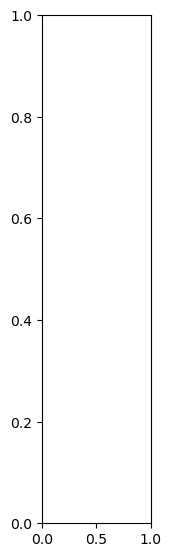

In [89]:
shap.summary_plot(sh.values, X_train_m, color=plt.get_cmap("tab20c"))

In [ ]:
print([len(v) for v in shap_values])
#おそらく4クラスごとに、10000個のインスタンスのSHAP値が格納されている

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [64]:
shap.plots.waterfall(shap_values[0][0])

AttributeError: 'numpy.ndarray' object has no attribute 'base_values'

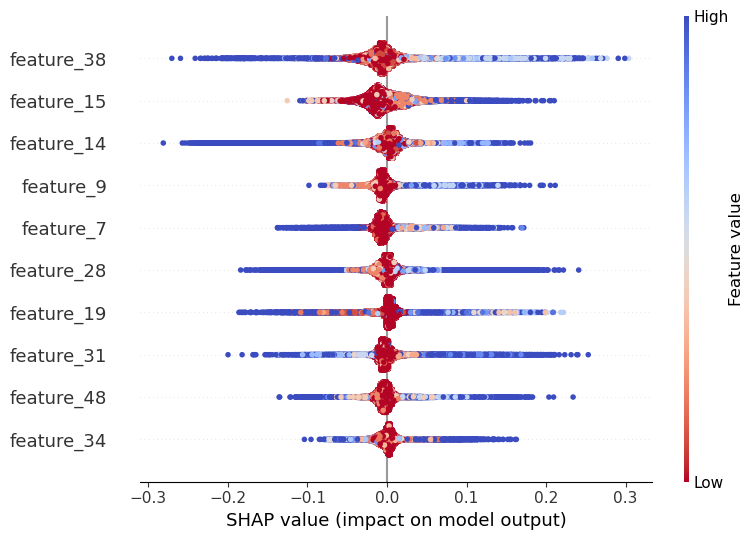

In [92]:
shap.summary_plot(shap_values[0], X_train_m, show = False, cmap = 'coolwarm_r')
plt.gcf().axes[-1].set_aspect(100)
plt.gcf().axes[-1].set_box_aspect(100)

shap2